# 🏠 House Price Prediction using Linear Regression
## A Beginner's Guide to Regression in Data Science

---

### What will we learn?
In this notebook, we'll build a **Linear Regression** model to predict house prices based on features like:
- 📐 House area (sqft)
- 🛏️ Number of bedrooms
- 🏚️ Age of the house
- 🚗 Whether it has a garage
- 🌆 Distance to the city

### What is Linear Regression?
> **Linear Regression** is a method to find the best straight line (or formula) that describes the relationship between input features and an output.
> 
> Example: `Price = 80 × Area + 15000 × Bedrooms + ...`

---

## Step 1: Import Libraries
Think of libraries as toolboxes 🧰 — each one gives us ready-made tools so we don't have to build everything from scratch.

In [1]:
import pandas as pd          # For reading & working with data (like Excel in Python)
import numpy as np           # For math operations
import matplotlib.pyplot as plt   # For creating charts
import seaborn as sns        # For beautiful statistical charts

from sklearn.model_selection import train_test_split   # To split data
from sklearn.linear_model import LinearRegression      # The regression model
from sklearn.preprocessing import StandardScaler       # To normalize data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # To evaluate

import warnings
warnings.filterwarnings('ignore')

# Make plots look nice
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
sns.set_theme(style='whitegrid', palette='muted')

print('✅ All libraries imported successfully!')

✅ All libraries imported successfully!


---
## Step 2: Load and Explore the Data
Before building any model, we need to **understand our data** — just like reading a recipe before cooking! 🍳

In [2]:
# Load the dataset from our Excel file
df = pd.read_excel('house_price_dataset.xlsx', sheet_name='House Dataset')

print(f'Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns')
print('\n📋 First 5 rows of data:')
df.head()

Dataset Shape: 500 rows × 7 columns

📋 First 5 rows of data:


,House_ID,Area_sqft,Bedrooms,Age_years,Distance_to_City_km,Has_Garage,Price_USD
0,1,3674,4,24,26.3,0,335891
1,2,1360,2,31,22.2,1,154341
2,3,1794,3,6,24.4,1,220443
3,4,1630,4,2,20.1,1,207142
4,5,1595,5,20,21.1,1,242838


In [3]:
# Get a quick statistical summary
print('📊 Statistical Summary of each column:')
print('(count, mean, std = standard deviation, min, max, etc.)')
df.describe().round(2)

📊 Statistical Summary of each column:
(count, mean, std = standard deviation, min, max, etc.)


,House_ID,Area_sqft,Bedrooms,Age_years,Distance_to_City_km,Has_Garage,Price_USD
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,2319.38,3.05,25.19,16.02,0.70,250934.31
std,144.48,1003.67,1.46,14.22,8.61,0.46,88153.00
min,1.00,501.00,1.00,1.00,1.10,0.00,51878.00
25%,125.75,1478.75,2.00,12.00,8.15,0.00,180638.00
50%,250.50,2297.50,3.00,26.00,16.60,1.00,248103.50
75%,375.25,3208.00,4.00,37.00,23.52,1.00,323335.00
max,500.00,3999.00,5.00,49.00,30.00,1.00,462444.00


In [4]:
# Check for missing values — missing data can ruin a model!
print('🔍 Checking for missing values in each column:')
missing = df.isnull().sum()
print(missing)
print(f'\n✅ Total missing values: {missing.sum()} — Great, no missing data!')

🔍 Checking for missing values in each column:
House_ID               0
Area_sqft              0
Bedrooms               0
Age_years              0
Distance_to_City_km    0
Has_Garage             0
Price_USD              0
dtype: int64

✅ Total missing values: 0 — Great, no missing data!


---
## Step 3: Data Visualization — Understanding Our Data Visually 👀

Charts help us see patterns that numbers alone can't show. Let's explore!

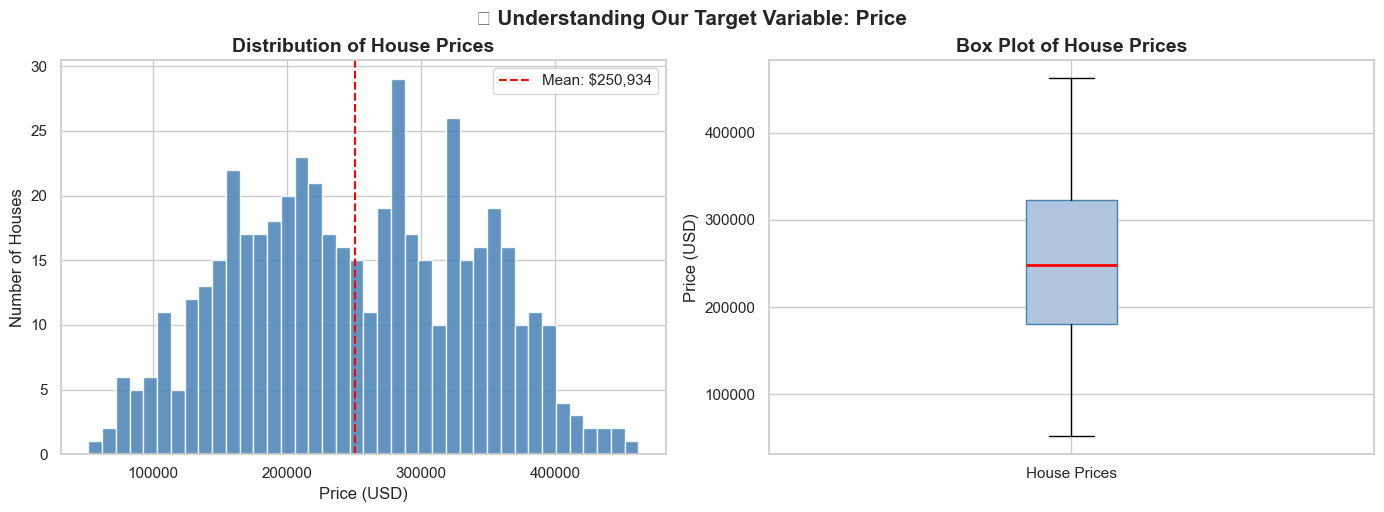

Average House Price: $250,934
Price Range: $51,878 – $462,444


In [5]:
# 3.1 — Distribution of House Prices (our TARGET variable)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Price_USD'], bins=40, color='steelblue', edgecolor='white', alpha=0.85)
axes[0].set_title('Distribution of House Prices', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price (USD)')
axes[0].set_ylabel('Number of Houses')
axes[0].axvline(df['Price_USD'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Price_USD"].mean():,.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df['Price_USD'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightsteelblue', color='steelblue'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Box Plot of House Prices', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Price (USD)')
axes[1].set_xticklabels(['House Prices'])

plt.tight_layout()
plt.suptitle('📊 Understanding Our Target Variable: Price', y=1.02, fontsize=15, fontweight='bold')
plt.show()

print(f'Average House Price: ${df["Price_USD"].mean():,.0f}')
print(f'Price Range: ${df["Price_USD"].min():,.0f} – ${df["Price_USD"].max():,.0f}')

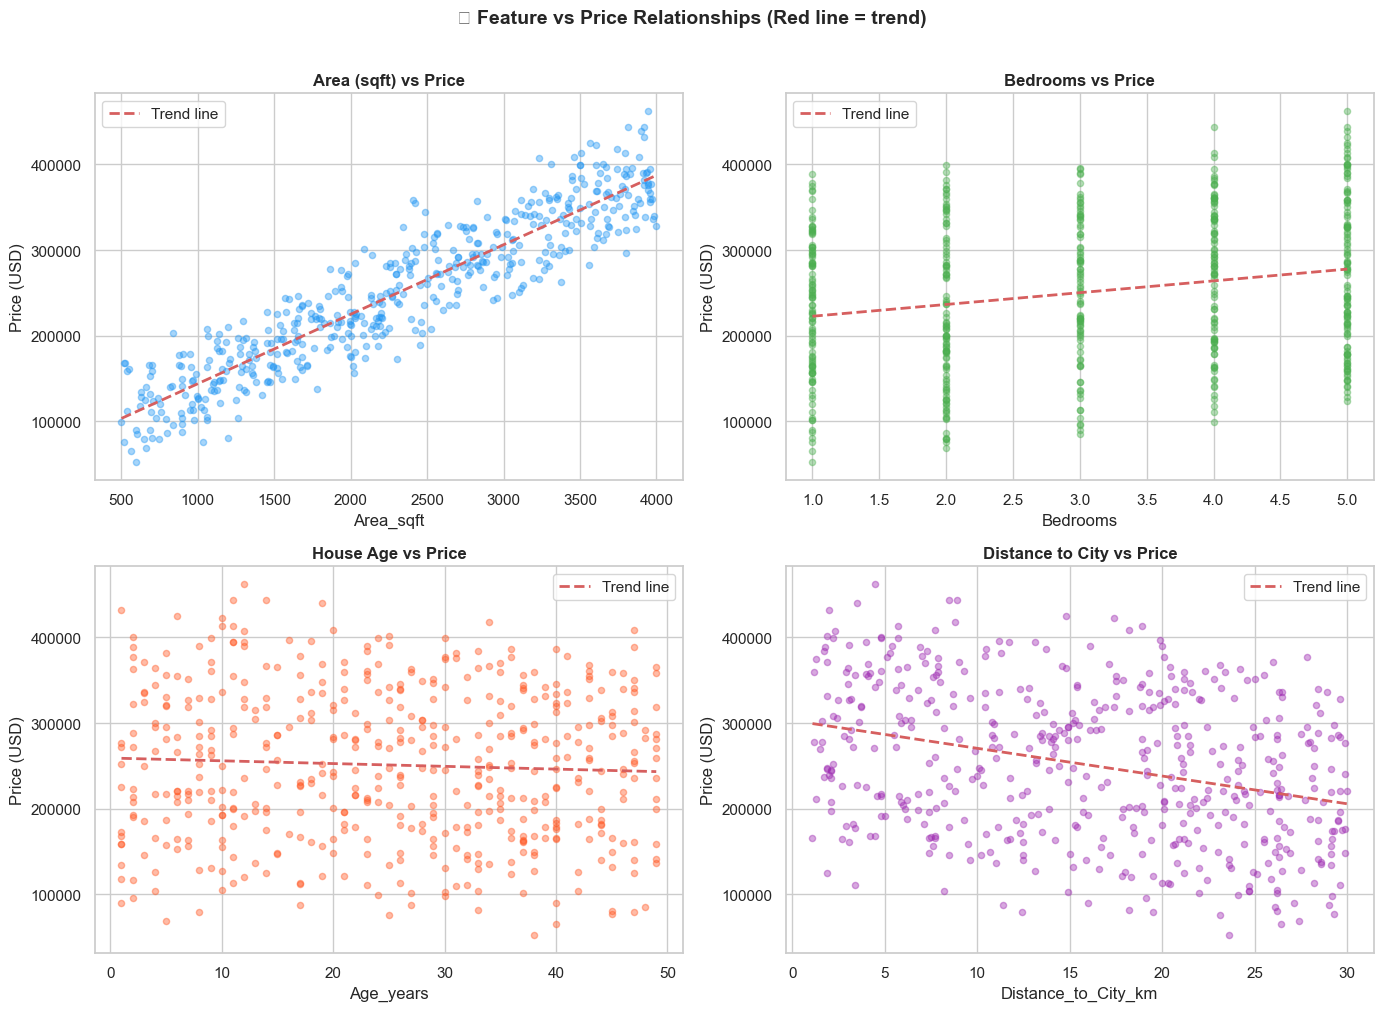

📌 Key Observations:
  • Area ↑ → Price ↑ (positive relationship)
  • More bedrooms → Higher price (positive)
  • Older house → Lower price (negative)
  • Farther from city → Lower price (negative)


In [6]:
# 3.2 — How does each feature relate to Price? (Scatter plots)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

features = ['Area_sqft', 'Bedrooms', 'Age_years', 'Distance_to_City_km']
colors = ['#2196F3', '#4CAF50', '#FF5722', '#9C27B0']
titles = ['Area (sqft) vs Price', 'Bedrooms vs Price', 'House Age vs Price', 'Distance to City vs Price']

for ax, feat, color, title in zip(axes.flatten(), features, colors, titles):
    ax.scatter(df[feat], df['Price_USD'], alpha=0.4, color=color, s=20)
    # Add trend line
    z = np.polyfit(df[feat], df['Price_USD'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[feat].min(), df[feat].max(), 100)
    ax.plot(x_line, p(x_line), 'r--', linewidth=2, label='Trend line')
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(feat)
    ax.set_ylabel('Price (USD)')
    ax.legend()

plt.suptitle('🔍 Feature vs Price Relationships (Red line = trend)', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

print('📌 Key Observations:')
print('  • Area ↑ → Price ↑ (positive relationship)')
print('  • More bedrooms → Higher price (positive)')
print('  • Older house → Lower price (negative)')
print('  • Farther from city → Lower price (negative)')

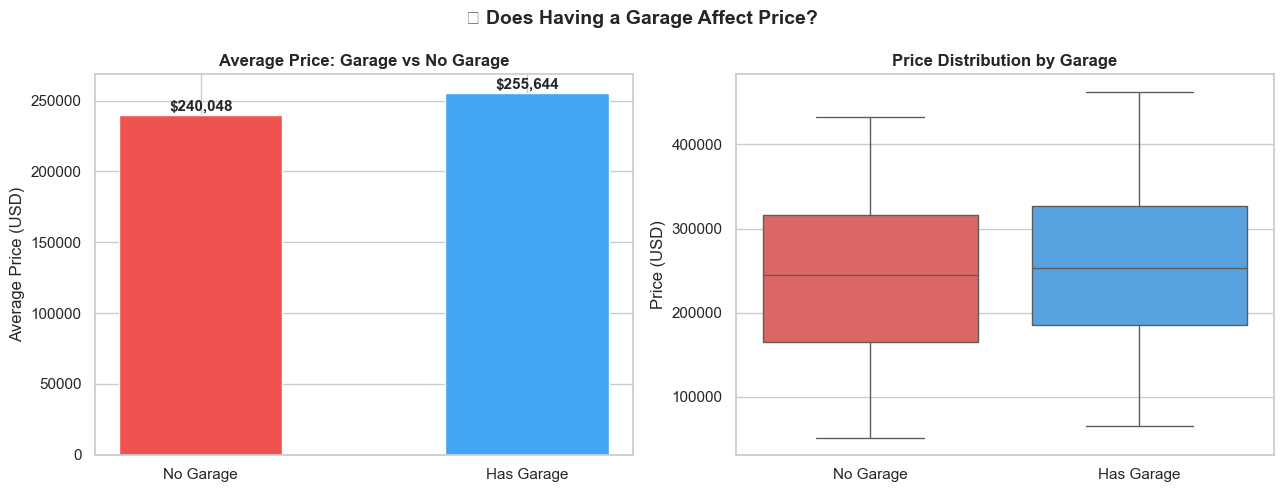

In [7]:
# 3.3 — Garage vs No Garage — Price Comparison
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Bar chart of average price
avg_price = df.groupby('Has_Garage')['Price_USD'].mean()
labels = ['No Garage', 'Has Garage']
bars = axes[0].bar(labels, avg_price.values, color=['#EF5350', '#42A5F5'], edgecolor='white', width=0.5)
for bar, val in zip(bars, avg_price.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3000,
                 f'${val:,.0f}', ha='center', fontweight='bold', fontsize=11)
axes[0].set_title('Average Price: Garage vs No Garage', fontweight='bold')
axes[0].set_ylabel('Average Price (USD)')

# Box plot comparison
df['Garage_Label'] = df['Has_Garage'].map({0: 'No Garage', 1: 'Has Garage'})
sns.boxplot(x='Garage_Label', y='Price_USD', data=df, palette=['#EF5350', '#42A5F5'], ax=axes[1])
axes[1].set_title('Price Distribution by Garage', fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('Price (USD)')

plt.suptitle('🚗 Does Having a Garage Affect Price?', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

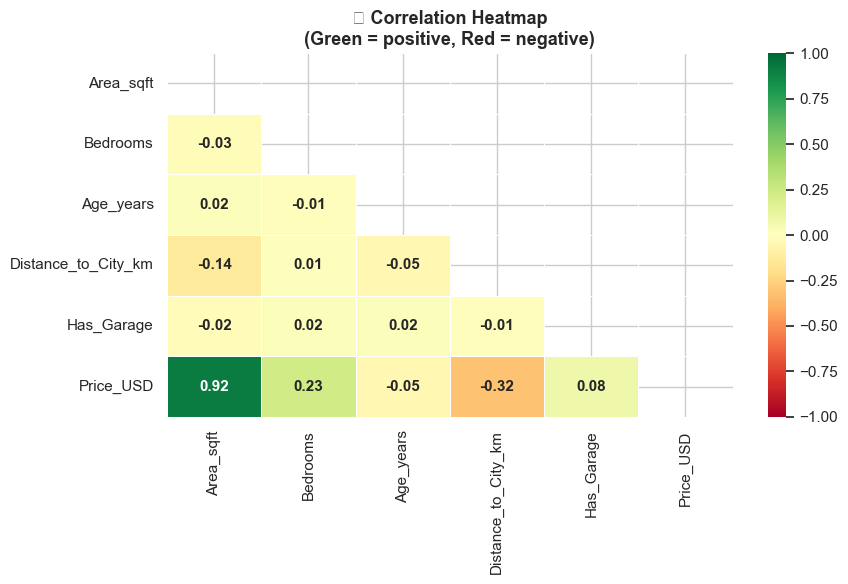

📌 Correlation of features with Price_USD:
Area_sqft              0.92
Bedrooms               0.23
Has_Garage             0.08
Age_years             -0.05
Distance_to_City_km   -0.32
Name: Price_USD, dtype: float64


In [8]:
# 3.4 — Correlation Heatmap
# Correlation tells us how strongly two variables are related
# Values close to 1 or -1 = strong relationship; close to 0 = weak relationship

plt.figure(figsize=(9, 6))
corr_df = df.drop(columns=['House_ID', 'Garage_Label'])
corr = corr_df.corr().round(2)

mask = np.triu(np.ones_like(corr, dtype=bool))  # Hide upper triangle (mirror)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdYlGn',
            vmin=-1, vmax=1, mask=mask, linewidths=0.5,
            annot_kws={'size': 11, 'weight': 'bold'})

plt.title('🔥 Correlation Heatmap\n(Green = positive, Red = negative)', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

print('📌 Correlation of features with Price_USD:')
print(corr['Price_USD'].drop('Price_USD').sort_values(ascending=False))

---
## Step 4: Prepare Data for Modeling

### What is X and y?
- **X (Features/Inputs)** = The things we know about each house (area, bedrooms, etc.)
- **y (Target/Output)** = What we want to predict (price)

### Why split into Train and Test?
We split data so the model **learns** on one part (training set) and gets **tested** on data it has never seen before (test set). This is like studying from a textbook and then taking an exam with new questions!

In [9]:
# Define Features (X) and Target (y)
feature_cols = ['Area_sqft', 'Bedrooms', 'Age_years', 'Distance_to_City_km', 'Has_Garage']

X = df[feature_cols]   # Input features
y = df['Price_USD']    # What we want to predict

print('Features (X):')
print(X.head(3))
print(f'\nTarget (y) — First 3 prices: {y.head(3).values}')

Features (X):
   Area_sqft  Bedrooms  Age_years  Distance_to_City_km  Has_Garage
0       3674         4         24                 26.3           0
1       1360         2         31                 22.2           1
2       1794         3          6                 24.4           1

Target (y) — First 3 prices: [335891 154341 220443]


Total dataset size: 500 houses
Training set:  400 houses (80%) — Model LEARNS from this
Test set:      100 houses (20%) — Model is EVALUATED on this


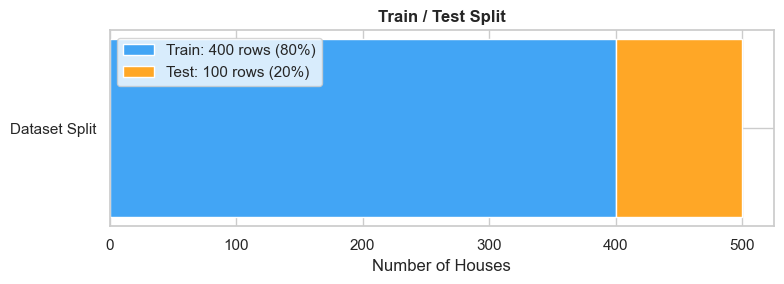

In [10]:
# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f'Total dataset size: {len(df)} houses')
print(f'Training set:  {len(X_train)} houses (80%) — Model LEARNS from this')
print(f'Test set:      {len(X_test)} houses (20%) — Model is EVALUATED on this')

# Visualize the split
fig, ax = plt.subplots(figsize=(8, 3))
ax.barh(['Dataset Split'], [len(X_train)], color='#42A5F5', label=f'Train: {len(X_train)} rows (80%)')
ax.barh(['Dataset Split'], [len(X_test)], left=len(X_train), color='#FFA726', label=f'Test: {len(X_test)} rows (20%)')
ax.set_xlabel('Number of Houses')
ax.set_title('Train / Test Split', fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()

In [11]:
# Feature Scaling — Make all features on the same scale
# WHY? Area is in thousands, while Bedrooms is 1-5. Scaling brings them to similar range.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Learn scale from training data and apply
X_test_scaled  = scaler.transform(X_test)        # Only apply (don't learn) on test data

print('Before scaling — Area_sqft sample values:', X_train['Area_sqft'].values[:5])
print('After  scaling — Area_sqft sample values:', X_train_scaled[:5, 0].round(2))
print('\n✅ Scaling done! All features now have mean ≈ 0 and same scale.')

Before scaling — Area_sqft sample values: [1141 3475 1269 1380 3804]
After  scaling — Area_sqft sample values: [-1.13  1.17 -1.01 -0.9   1.5 ]

✅ Scaling done! All features now have mean ≈ 0 and same scale.


---
## Step 5: Build & Train the Linear Regression Model 🏗️

This is where the **magic** happens! The model finds the best mathematical formula to predict prices.

In [12]:
# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)   # The model 'learns' from the training data

print('✅ Model trained successfully!')
print('\nThe model learned these coefficients (weights) for each feature:')
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_.round(0)
})
print(coef_df.to_string(index=False))
print(f'\nIntercept (base price): ${model.intercept_:,.0f}')

✅ Model trained successfully!

The model learned these coefficients (weights) for each feature:
            Feature  Coefficient
          Area_sqft      80914.0
           Bedrooms      22627.0
          Age_years      -6922.0
Distance_to_City_km     -17140.0
         Has_Garage       7776.0

Intercept (base price): $248,108


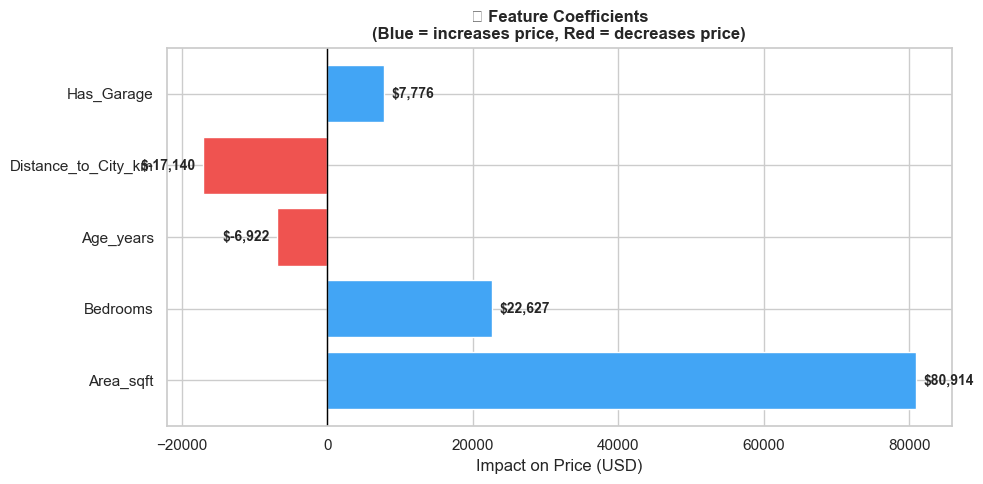

📌 Interpretation:
  • Area_sqft has the biggest POSITIVE effect on price
  • Distance_to_City NEGATIVELY impacts price


In [13]:
# Visualize Feature Importance (coefficients)
fig, ax = plt.subplots(figsize=(10, 5))

colors = ['#42A5F5' if c > 0 else '#EF5350' for c in model.coef_]
bars = ax.barh(feature_cols, model.coef_, color=colors, edgecolor='white')

for bar, val in zip(bars, model.coef_):
    ax.text(val + (1000 if val > 0 else -1000), bar.get_y() + bar.get_height()/2,
            f'${val:,.0f}', va='center', ha='left' if val > 0 else 'right',
            fontweight='bold', fontsize=10)

ax.axvline(0, color='black', linewidth=1)
ax.set_xlabel('Impact on Price (USD)')
ax.set_title('📊 Feature Coefficients\n(Blue = increases price, Red = decreases price)', fontweight='bold')
plt.tight_layout()
plt.show()

print('📌 Interpretation:')
print('  • Area_sqft has the biggest POSITIVE effect on price')
print('  • Distance_to_City NEGATIVELY impacts price')

---
## Step 6: Make Predictions & Evaluate the Model 📏

Now let's see how well our model performs on data it has **never seen before** (the test set)!

### Key Metrics:
- **MAE** (Mean Absolute Error): On average, how many dollars is our prediction off?
- **RMSE** (Root Mean Squared Error): Similar to MAE but penalizes big errors more
- **R² Score**: How much of price variation does our model explain? (0 = bad, 1 = perfect)

In [14]:
# Predict prices on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print('=' * 45)
print('        📈 MODEL PERFORMANCE METRICS')
print('=' * 45)
print(f'  MAE  (Mean Absolute Error):  ${mae:>12,.0f}')
print(f'  RMSE (Root Mean Sq. Error):  ${rmse:>12,.0f}')
print(f'  R²   Score:                   {r2:>12.4f}')
print('=' * 45)
print(f'\n✅ Our model explains {r2*100:.1f}% of house price variation!')
print(f'   On average, predictions are off by ${mae:,.0f}')

        📈 MODEL PERFORMANCE METRICS
  MAE  (Mean Absolute Error):  $      11,864
  RMSE (Root Mean Sq. Error):  $      14,311
  R²   Score:                         0.9704

✅ Our model explains 97.0% of house price variation!
   On average, predictions are off by $11,864


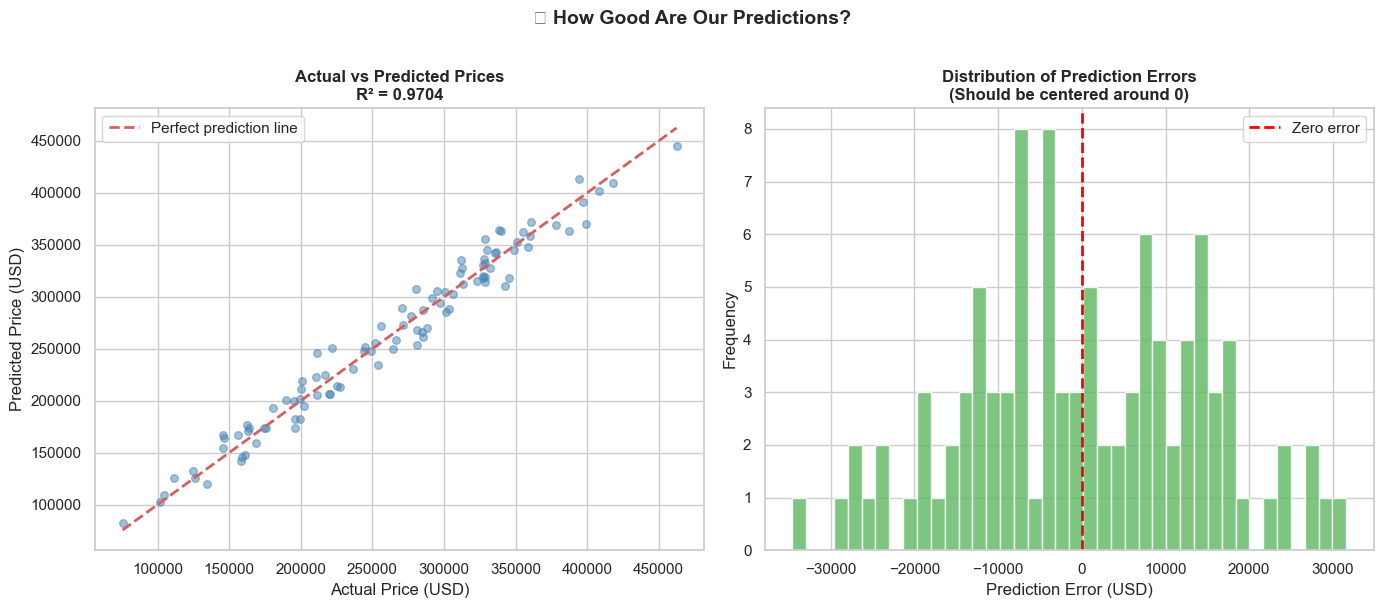

In [15]:
# 6.1 — Actual vs Predicted Prices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter: actual vs predicted
axes[0].scatter(y_test, y_pred, alpha=0.5, color='steelblue', s=30)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect prediction line')
axes[0].set_xlabel('Actual Price (USD)')
axes[0].set_ylabel('Predicted Price (USD)')
axes[0].set_title(f'Actual vs Predicted Prices\nR² = {r2:.4f}', fontweight='bold')
axes[0].legend()

# The closer points are to the red line, the better the model!

# Residuals (Errors)
residuals = y_test.values - y_pred
axes[1].hist(residuals, bins=40, color='#66BB6A', edgecolor='white', alpha=0.85)
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero error')
axes[1].set_xlabel('Prediction Error (USD)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Prediction Errors\n(Should be centered around 0)', fontweight='bold')
axes[1].legend()

plt.suptitle('🎯 How Good Are Our Predictions?', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

In [16]:
# 6.2 — Sample predictions vs actuals
comparison = pd.DataFrame({
    'Actual Price': y_test.values[:15],
    'Predicted Price': y_pred[:15].astype(int),
    'Error ($)': (y_test.values[:15] - y_pred[:15]).astype(int),
    'Error (%)': ((abs(y_test.values[:15] - y_pred[:15]) / y_test.values[:15]) * 100).round(1)
})

print('📋 Sample Predictions vs Actual Prices (first 15 houses):')
print(comparison.to_string(index=False))

📋 Sample Predictions vs Actual Prices (first 15 houses):
 Actual Price  Predicted Price  Error ($)  Error (%)
       336249           343502      -7253        2.2
       284384           266533      17850        6.3
       199326           181880      17445        8.8
       329991           344912     -14921        4.5
       146159           163673     -17514       12.0
       287819           270376      17442        6.1
       202179           194960       7218        3.6
       227189           213277      13911        6.1
       328722           314435      14286        4.3
       221579           250566     -28987       13.1
       220015           206764      13250        6.0
       174141           173601        539        0.3
       125906           125832         73        0.1
       342400           310805      31594        9.2
       180817           193130     -12313        6.8


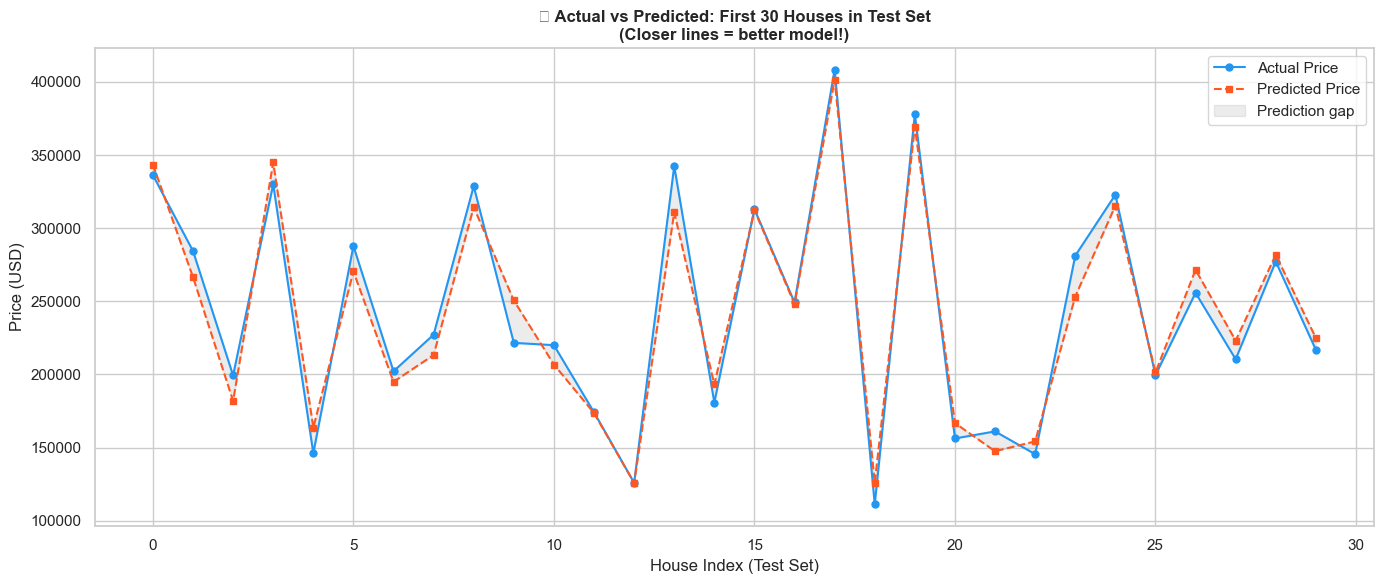

In [17]:
# 6.3 — Visual comparison of first 30 predictions
fig, ax = plt.subplots(figsize=(14, 6))

x_range = range(30)
ax.plot(x_range, y_test.values[:30], 'o-', color='#2196F3', label='Actual Price', linewidth=1.5, markersize=5)
ax.plot(x_range, y_pred[:30], 's--', color='#FF5722', label='Predicted Price', linewidth=1.5, markersize=5)

ax.fill_between(x_range, y_test.values[:30], y_pred[:30], alpha=0.15, color='gray', label='Prediction gap')
ax.set_xlabel('House Index (Test Set)')
ax.set_ylabel('Price (USD)')
ax.set_title('📉 Actual vs Predicted: First 30 Houses in Test Set\n(Closer lines = better model!)', fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()

---
## Step 7: Predict a New House Price 🏡

Let's use our trained model to predict the price of a brand new house!

In [18]:
# Define a new house
new_house = {
    'Area_sqft':           2000,   # 2000 square feet
    'Bedrooms':               3,   # 3 bedrooms
    'Age_years':             10,   # 10 years old
    'Distance_to_City_km':    8,   # 8 km from city
    'Has_Garage':             1    # Has a garage
}

# Convert to DataFrame, scale it, and predict
new_house_df = pd.DataFrame([new_house])
new_house_scaled = scaler.transform(new_house_df)
predicted_price = model.predict(new_house_scaled)[0]

print('🏠 New House Details:')
for k, v in new_house.items():
    print(f'   {k}: {v}')
print(f'\n💰 Predicted Price: ${predicted_price:,.0f}')

🏠 New House Details:
   Area_sqft: 2000
   Bedrooms: 3
   Age_years: 10
   Distance_to_City_km: 8
   Has_Garage: 1

💰 Predicted Price: $253,017


---
## Step 8: Summary & Key Takeaways 🎓

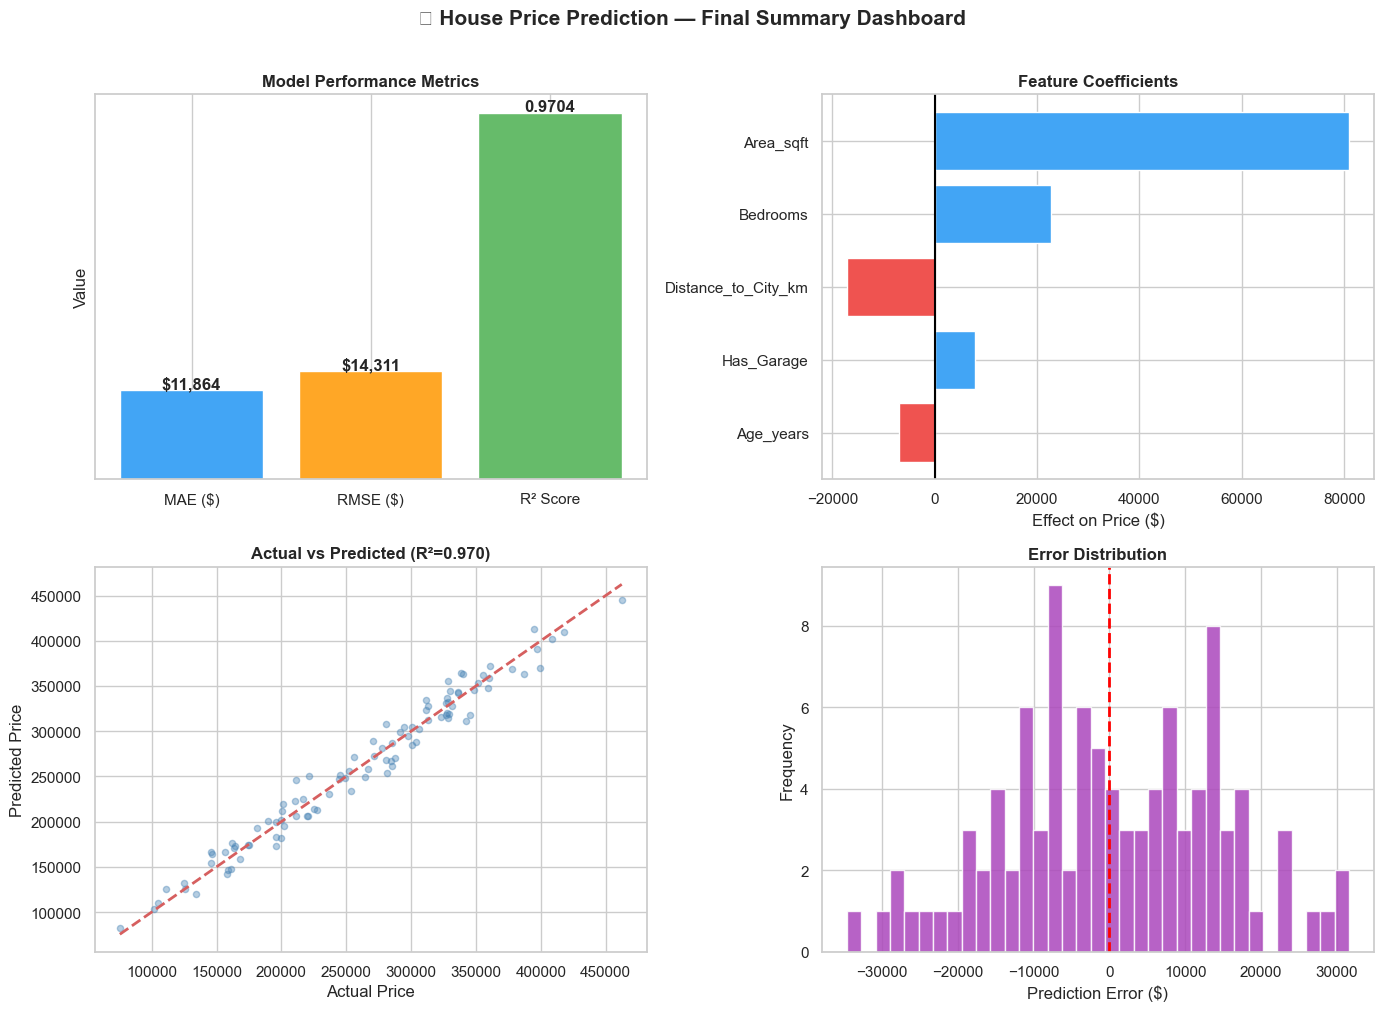

In [19]:
# Final Summary Dashboard
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- 1. Metric summary ---
metrics = ['MAE ($)', 'RMSE ($)', 'R² Score']
values  = [mae, rmse, r2 * 100000]  # scale R2 for visibility
display = [f'${mae:,.0f}', f'${rmse:,.0f}', f'{r2:.4f}']
bar_colors = ['#42A5F5', '#FFA726', '#66BB6A']
bars = axes[0, 0].bar(metrics, [mae, rmse, r2 * 50000], color=bar_colors, edgecolor='white')
for bar, label in zip(bars, display):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
                    label, ha='center', fontweight='bold', fontsize=12)
axes[0, 0].set_title('Model Performance Metrics', fontweight='bold')
axes[0, 0].set_ylabel('Value')
axes[0, 0].set_yticks([])

# --- 2. Feature Importance ---
sorted_idx = np.argsort(np.abs(model.coef_))
sorted_feats = [feature_cols[i] for i in sorted_idx]
sorted_coefs = [model.coef_[i] for i in sorted_idx]
colors2 = ['#42A5F5' if c > 0 else '#EF5350' for c in sorted_coefs]
axes[0, 1].barh(sorted_feats, sorted_coefs, color=colors2, edgecolor='white')
axes[0, 1].axvline(0, color='black')
axes[0, 1].set_title('Feature Coefficients', fontweight='bold')
axes[0, 1].set_xlabel('Effect on Price ($)')

# --- 3. Actual vs Predicted ---
axes[1, 0].scatter(y_test, y_pred, alpha=0.4, color='steelblue', s=20)
min_v, max_v = y_test.min(), y_test.max()
axes[1, 0].plot([min_v, max_v], [min_v, max_v], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Price')
axes[1, 0].set_ylabel('Predicted Price')
axes[1, 0].set_title(f'Actual vs Predicted (R²={r2:.3f})', fontweight='bold')

# --- 4. Error Distribution ---
axes[1, 1].hist(residuals, bins=35, color='#AB47BC', edgecolor='white', alpha=0.85)
axes[1, 1].axvline(0, color='red', lw=2, linestyle='--')
axes[1, 1].set_xlabel('Prediction Error ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Error Distribution', fontweight='bold')

plt.suptitle('🏠 House Price Prediction — Final Summary Dashboard', fontsize=15, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

In [20]:
print('=' * 55)
print('    🎓 WHAT WE LEARNED — KEY TAKEAWAYS')
print('=' * 55)
print('''
1. EXPLORED DATA
   → Loaded 500 house records from Excel
   → Visualized distributions, correlations

2. PREPARED DATA
   → Separated Features (X) from Target (y)
   → Split 80% training / 20% testing
   → Scaled features for better model performance

3. BUILT THE MODEL
   → Trained a Linear Regression model
   → Model learned weights for each feature

4. EVALUATED THE MODEL
''')
print(f'   → R² Score:  {r2:.4f} ({r2*100:.1f}% variance explained)')
print(f'   → MAE:       ${mae:,.0f} average error')
print(f'   → RMSE:      ${rmse:,.0f}')
print('''
5. MADE PREDICTIONS
   → Used the model to predict new house prices

📌 NEXT STEPS TO IMPROVE:
   → Try more features (neighborhood, school rating)
   → Use more advanced models (Random Forest, XGBoost)
   → Collect more data for better accuracy
''')
print('=' * 55)

    🎓 WHAT WE LEARNED — KEY TAKEAWAYS

1. EXPLORED DATA
   → Loaded 500 house records from Excel
   → Visualized distributions, correlations

2. PREPARED DATA
   → Separated Features (X) from Target (y)
   → Split 80% training / 20% testing
   → Scaled features for better model performance

3. BUILT THE MODEL
   → Trained a Linear Regression model
   → Model learned weights for each feature

4. EVALUATED THE MODEL

   → R² Score:  0.9704 (97.0% variance explained)
   → MAE:       $11,864 average error
   → RMSE:      $14,311

5. MADE PREDICTIONS
   → Used the model to predict new house prices

📌 NEXT STEPS TO IMPROVE:
   → Try more features (neighborhood, school rating)
   → Use more advanced models (Random Forest, XGBoost)
   → Collect more data for better accuracy

